In [1]:
from Players import *
from runs import *
import matplotlib.pyplot as plt
from utils import *
import seaborn as sns
from tic_env import *
import numpy as np
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.patheffects as PathEffects

### Table of Contents

* [2. Q-Learning](#2.Q-Learning)
    * [2.1 Learning from experts](#section2.1)
        * [Q1](#Q1) 
        * [2.1.1 Decreasing exploration](#section2.1.1)
            * [Q2](#Q2), [Q3](#Q3)
        * [2.1.2 Good experts and bad experts](#section2.1.2)
            * [Q4](#Q4), [Q5](#Q5), [Q6](#Q6)
    * [2.2 Learning by self-practice](#section2.2)
        * [Q7](#Q7), [Q8](#Q8), [Q9](#Q9), [Q10](#Q10)
* [3. Deep Q-Learning](#section3)
    * [3.1 Implementation details](#section3.1)
    * [3.2 Learning from experts](#section3.2)
        * [Q11](#Q11), [Q12](#Q12), [Q13](#Q13), [Q14](#Q14), [Q15](#Q15)
    * [3.3 Learning by self-practice](#section3.3)
        * [Q16](#Q16), [Q17](#Q17), [Q18](#Q18), [Q19](#Q19)
* [4. Comparing Q-Learning with Deep Q-Learning](#section4)
    * [Q20](#Q20), [Q21](#Q21)

## 2 Q-Learning <a class="anchor" id="2.Q-Learning"></a>
As our 1st algorithm, we use Q-Learning combined with $\epsilon$-greedy policy – see section 6.5 of Sutton and Barto (2018) for details. At each time $t$, state $s_t$ is the board position (showing empty positions, positions taken by you, and positions taken by your opponent; c.f. tic_tac_toe.ipynb), action at is one of the available positions on the board (i.e. $\epsilon$-greedy is applied only over the available actions), and reward $r_t$ is only non-zero when the game ends where you get $r_t$ = 1 if you win the game, $r_t$ = −1 if you lose, and $r_t$ = 0 if it is a draw.

*Q*-Learning has 3 hyper-parameters: learning rate $\alpha$, discount factor $\gamma$, and exploration level $\epsilon$. For
convenience, we fix the learning rate at $\alpha$ = 0.05 and the discount factor at γ = 0.99. We initialize all
the *Q*-values at 0; if you are curious, you can explore the effect of $\alpha$, $\gamma$, and initial *Q*-values for yourself.

## 2.1 Learning from experts <a class="anchor" id="section2.1"></a>

In this section, you will study whether *Q*-learning can learn to play Tic Tac Toe by playing against Opt($\epsilon_{opt}$) for some $\epsilon_{opt}$ ∈ [0, 1]. To do so, implement the Q-learning algorithm. To check the algorithm, run a Q-learning agent, with a fixed and arbitrary $\epsilon$ ∈ [0, 1], against Opt(0.5) for 20’000 games – switch the 1st player after every game.
### Question 1. <a class="anchor" id="Q1"></a>
Plot average reward for every 250 games during training – i.e. after the 50th game, plot the average reward of the first 250 games, after the 100th game, plot the average reward of games 51 to 100, etc. Does the agent learn to play Tic Tac Toe? <br>
*Expected answer:* A figure of average reward over time (caption length < 50 words). Specify your choice of $\epsilon$.

#### Answer:

In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

100%|██████████| 20000/20000 [00:57<00:00, 350.47it/s]


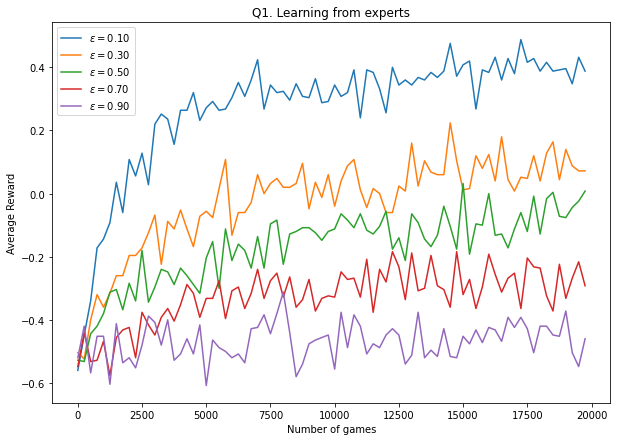

In [3]:
players = [QLearningPlayer(eps=0.1), QLearningPlayer(eps=0.3), QLearningPlayer(eps=0.5), QLearningPlayer(eps=0.7), QLearningPlayer(eps=0.9)]
env = TictactoeEnv()
rewards = []
for player in players:
    reward, _, _ = run_against_Opt(player, n_games=20000, opt_eps=0.5)
    rewards.append(reward)
    
plt.figure(figsize = (10,7))
epsilons = [0.1, 0.3, 0.5, 0.7, 0.9]
x = np.arange(0,20000,250)
for i, epsilon in enumerate(epsilons):
    plt.plot(x, rewards[i], label = r"$\epsilon = {:.2f}$".format(epsilon))
plt.xlabel('Number of games')
plt.ylabel('Average Reward')
plt.title('Q1. Learning from experts')
plt.legend(loc='upper left')
plt.show()

## 2.1.1 Decreasing exploration <a class="anchor" id="section2.1.1"></a>
One way to make training more efficient is to decrease the exploration level $\epsilon$ over time. If we define $\epsilon$(n)
to be $\epsilon$ for game number *n*, then one feasible way to decrease exploration during training is to use

$$
\begin{aligned}
\epsilon(n) = max({\epsilon_{min}, \epsilon_{max}(1−\frac{n}{n^*})}), (1)
\end{aligned}
$$

where $\epsilon_{min}$ and $\epsilon_{max}$ are the minimum and maximum values for $\epsilon$, respectively, and n$^*$ is the number of  exploratory games and shows how fast $\epsilon$ decreases. For convenience, we assume $\epsilon_{min}$ = 0.1 and $\epsilon_{max}$ = 0.8; if you are curious, you can explore their effect on performance for yourself. Use $\epsilon$ as define above and run different *Q*-learning agents with different values of n$^*$ against Opt(0.5) for 20’000 games – switch the 1st player after every game. Choose several values of n$^*$ from a reasonably wide interval between 1 to 40’000 – particularly, include n$^*$ = 1.
### Question 2. <a class="anchor" id="Q2"></a>
Plot average reward for every 250 games during training. Does decreasing $\epsilon$ help training
compared to having a fixed $\epsilon$ ? What is the effect of n$^*$ ? <br>
*Expected answer:* A figure showing average reward over time for different values of n$^*$ (caption length < 200 words).

#### Answer:

In [4]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

100%|██████████| 20000/20000 [00:59<00:00, 333.60it/s]


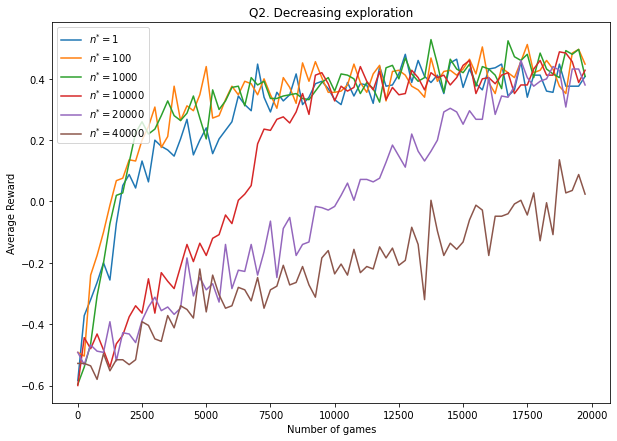

In [5]:
env = TictactoeEnv()
players = [QLearningPlayer(decreasing_exploration=True, n_star=1), 
           QLearningPlayer(decreasing_exploration=True, n_star=100), 
           QLearningPlayer(decreasing_exploration=True, n_star=1000), 
           QLearningPlayer(decreasing_exploration=True, n_star=10000), 
           QLearningPlayer(decreasing_exploration=True, n_star=20000), 
           QLearningPlayer(decreasing_exploration=True, n_star=40000)]

rewards = []
for player in players:
    reward, _, _ = run_against_Opt(player, n_games=20000, opt_eps=0.5)
    rewards.append(reward)
    
plt.figure(figsize = (10,7))
ns = [1, 100, 1000, 10000, 20000, 40000]
x = np.arange(0,20000,250)
for i, n in enumerate(ns):
    plt.plot(x, rewards[i], label = r"$n^{{*}} = {}$".format(n))
plt.xlabel('Number of games')
plt.ylabel('Average Reward')
plt.title('Q2. Decreasing exploration')
plt.legend(loc='upper left')
plt.show()

### Question 3. <a class="anchor" id="Q3"></a>
After every 250 games during training, compute the ‘test’ $M_{opt}$ and $M_{rand}$ for your agents – when measuring the ‘test’ performance, put $\epsilon$ = 0 and do not update the Q-values. Plot $M_{opt}$ and $M_{rand}$ over time. Describe the differences and the similarities between these curves and the ones of the previous question. <br>
*Expected answer:* A figure showing $M_{opt}$ and $M_{rand}$ over time for different values of n$^*$ (caption length < 100 words).

#### Answer:

In [6]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

100%|██████████| 20000/20000 [04:28<00:00, 74.58it/s] 


Text(0.5, 0, 'Number of games')

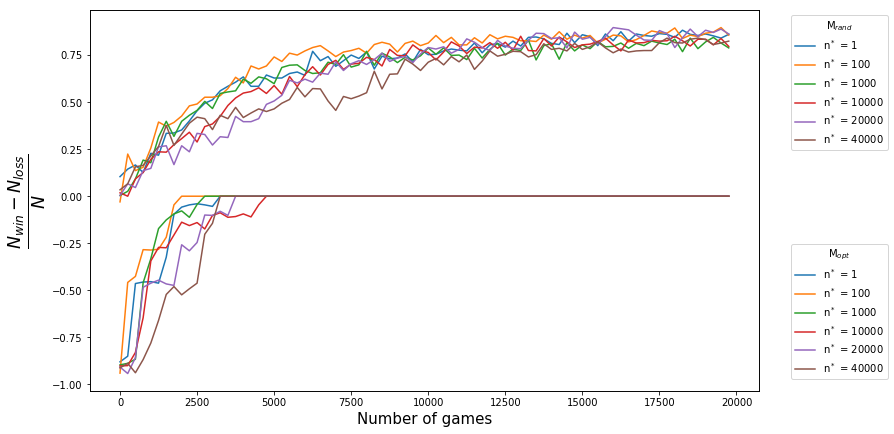

In [7]:
env = TictactoeEnv()
players = [QLearningPlayer(decreasing_exploration=True, n_star=1), 
           QLearningPlayer(decreasing_exploration=True, n_star=100), 
           QLearningPlayer(decreasing_exploration=True, n_star=1000), 
           QLearningPlayer(decreasing_exploration=True, n_star=10000), 
           QLearningPlayer(decreasing_exploration=True, n_star=20000), 
           QLearningPlayer(decreasing_exploration=True, n_star=40000)]

rewards = []
M_opts = []
M_rands = []
for player in players:
    reward, M_opt, M_rand = run_against_Opt(player, n_games=20000, opt_eps=0.5, return_M_opt=True, return_M_rand=True)
    rewards.append(reward)
    M_opts.append(M_opt)
    M_rands.append(M_rand)
    
ns = [1, 100, 1000, 10000, 20000, 40000]
x = np.arange(0,20000,250)
fig, ax = plt.subplots(figsize= (12,7))

for i, n in enumerate(ns):
    ax.plot(x, M_opts[i], label = r'n$^*$ = {:.0f}'.format(n))

ax.legend( loc = 'upper left', title = r'M$_{{opt}}$', bbox_to_anchor = (1.04, 0.4), prop={'size': 10}) 


ax2 = ax.twiny()
for i, n in enumerate(ns):
    ax2.plot(x, M_rands[i], label = r'n$^*$ = {:.0f}'.format(n))
ax2.get_xaxis().set_visible(False) 
ax2.legend(loc = 'upper left', title = r'M$_{{rand}}$', bbox_to_anchor = (1.04, 1), prop={'size': 10}) 

ax.yaxis.label.set_size(25)
ax.xaxis.label.set_size(15)
ax.set_ylabel(r"$\frac{N_{win} - N_{loss}}{N}$")
ax.set_xlabel("Number of games")

## 2.1.2 Good experts and bad experts <a class="anchor" id="section2.1.2"></a>
Choose the best value of n$^*$ that you found in the previous section. Run Q-learning against Opt($\epsilon_{opt}$) for different values of $\epsilon_{opt}$ for 20’000 games – switch the 1st player after every game. Choose several values of $\epsilon_{opt}$ from a reasonably wide interval between 0 to 1 – particularly, include $\epsilon_{opt}$ = 0.

### Question 4. <a class="anchor" id="Q4"></a>
After every 250 games during training, compute the ‘test’ $M_{opt}$ and $M_{rand}$ for your agents – for each value of $\epsilon_{opt}$. Plot $M_{opt}$ and $M_{rand}$ over time. What do you observe? How can you explain it? <br>
*Expected answer:* A figure showing $M_{opt}$ and $M_{rand}$ over time for different values of $\epsilon_{opt}$ (caption length < 250 words).

#### Answer:

In [8]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

100%|██████████| 20000/20000 [03:41<00:00, 90.47it/s] 


Text(0.5, 0, 'Number of games')

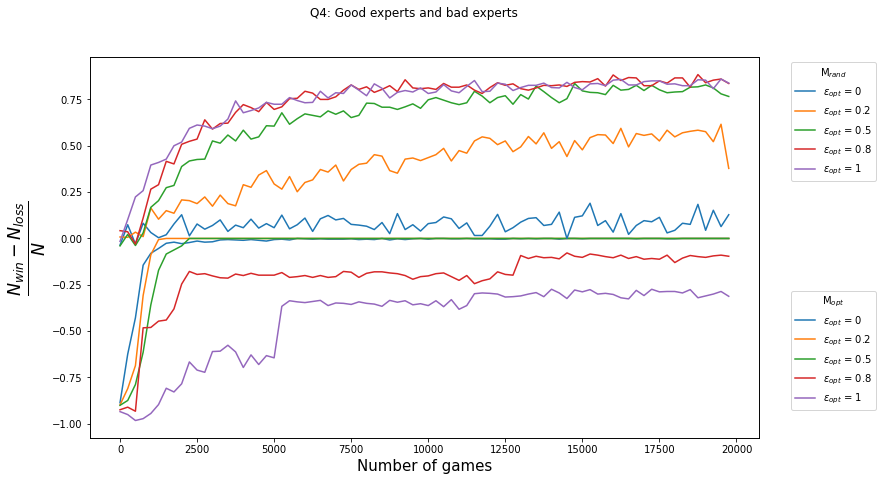

In [9]:
env = TictactoeEnv()
players = [QLearningPlayer(decreasing_exploration=True, n_star=1000),
           QLearningPlayer(decreasing_exploration=True, n_star=1000),
           QLearningPlayer(decreasing_exploration=True, n_star=1000),
           QLearningPlayer(decreasing_exploration=True, n_star=1000),
           QLearningPlayer(decreasing_exploration=True, n_star=1000)]

rewards = []
M_opts = []
M_rands = []
opts_eps = [0, 0.2, 0.5, 0.8, 1]
for i, opt_eps in enumerate(opts_eps):
    reward, M_opt, M_rand = run_against_Opt(players[i], n_games=20000, opt_eps=opt_eps, return_M_opt=True, return_M_rand=True)
    rewards.append(reward)
    M_opts.append(M_opt)
    M_rands.append(M_rand)
    
x = np.arange(0,20000,250)
fig, ax = plt.subplots(figsize= (12,7))
fig.suptitle("Q4: Good experts and bad experts")

for i, opt_eps in enumerate(opts_eps):
    ax.plot(x, M_opts[i], label = r"$\epsilon_{{opt}}$ = {}".format(opt_eps))

ax.legend( loc = 'upper left', title = r'M$_{{opt}}$', bbox_to_anchor = (1.04, 0.4), prop={'size': 10}) 


ax2 = ax.twiny()
for i, opt_eps in enumerate(opts_eps):
    ax2.plot(x, M_rands[i], label = r"$\epsilon_{{opt}}$ = {}".format(opt_eps))
ax2.get_xaxis().set_visible(False) 
ax2.legend(loc = 'upper left', title = r'M$_{{rand}}$', bbox_to_anchor = (1.04, 1), prop={'size': 10}) 

ax.yaxis.label.set_size(25)
ax.xaxis.label.set_size(15)
ax.set_ylabel(r"$\frac{N_{win} - N_{loss}}{N}$")
ax.set_xlabel("Number of games")

### Question 5. <a class="anchor" id="Q5"></a>
What are the highest values of $M_{opt}$ and $M_{rand}$ that you could achieve after playing 20’000 games?

#### Answer:

In [10]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [11]:
print("Best M_opt after 20000 games: {:.3f}".format(np.max(M_opts)))
print('Best M_rand after 20000 games: {:.3f}'.format(np.max(M_rands)))
M_opts_expert = M_opts
M_rands_expert = M_rands

Best M_opt after 20000 games: 0.000
Best M_rand after 20000 games: 0.884


### Question 6. (Theory) <a class="anchor" id="Q6"></a>
Assume that Agent 1 learns by playing against Opt(0) and find the optimal *Q*-values $Q_1(s, a)$. In addition, assume that Agent 2 learns by playing against Opt(1) and find the optimal *Q*-values $Q_2(s, a)$. Do $Q_1(s, a)$ and $Q_2(s, a)$ have the same values? Justify your answer. (answer length < 150 words)

#### Answer:

In [12]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [13]:
pass

## 2.2 Learning by self-practice <a class="anchor" id="section2.2"></a>
In this section, your are supposed to ask whether *Q*-learning can learn to play Tic Tac Toe by only playing against itself. For different values of $\epsilon$ ∈ [0, 1], run a *Q*-learning agent against itself for 20’000 games – i.e. both players use the same set of *Q*-values and update the same set of *Q*-values.

### Question 7. <a class="anchor" id="Q7"></a>
After every 250 games during training, compute the ‘test’ $M_{opt}$ and $M_{rand}$ for different values of $\epsilon$ ∈ [0, 1]. Does the agent learn to play Tic Tac Toe? What is the effect of $\epsilon$ ? <br>
*Expected answer:* A figure showing $M_{opt}$ and $M_{rand}$ over time for different values of $\epsilon$ ∈ [0, 1] (caption length < 100 words).
For rest of this section, use $\epsilon$(n) in Equation 1 with different values of n$^*$ – instead of fixing $\epsilon$.

#### Answer:

In [14]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

100%|██████████| 20000/20000 [03:27<00:00, 96.28it/s] 


Text(0.5, 0, 'Number of games')

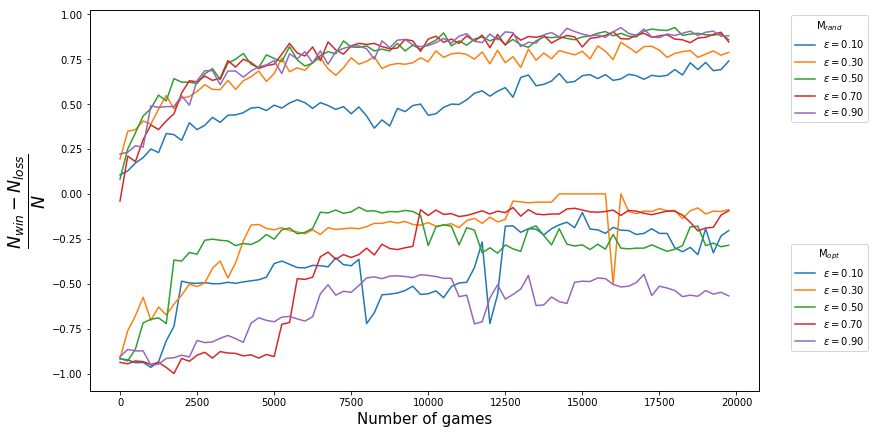

In [15]:
env = TictactoeEnv()
players = [QLearningPlayer(eps=0.1), 
           QLearningPlayer(eps=0.3), 
           QLearningPlayer(eps=0.5), 
           QLearningPlayer(eps=0.7), 
           QLearningPlayer(eps=0.9)]

M_opts = []
M_rands = []
for player in players:
    M_opt, M_rand = run_against_itself(player, n_games=20000, return_M_opt=True, return_M_rand=True)
    M_opts.append(M_opt)
    M_rands.append(M_rand)
    
epsilons = [0.1, 0.3, 0.5, 0.7, 0.9]
x = np.arange(0,20000,250)
fig, ax = plt.subplots(figsize= (12,7))

for i, epsilon in enumerate(epsilons):
    ax.plot(x, M_opts[i], label = r"$\epsilon = {:.2f}$".format(epsilon))

ax.legend( loc = 'upper left', title = r'M$_{{opt}}$', bbox_to_anchor = (1.04, 0.4), prop={'size': 10}) 


ax2 = ax.twiny()
for i, epsilon in enumerate(epsilons):
    ax2.plot(x, M_rands[i], label = r"$\epsilon = {:.2f}$".format(epsilon))
ax2.get_xaxis().set_visible(False) 
ax2.legend(loc = 'upper left', title = r'M$_{{rand}}$', bbox_to_anchor = (1.04, 1), prop={'size': 10}) 

ax.yaxis.label.set_size(25)
ax.xaxis.label.set_size(15)
ax.set_ylabel(r"$\frac{N_{win} - N_{loss}}{N}$")
ax.set_xlabel("Number of games")

### Question 8. <a class="anchor" id="Q8"></a>
After every 250 games during training, compute the ‘test’ $M_{opt}$ and $M_{rand}$ for your agents. Does decreasing $\epsilon$ help training compared to having a fixed $\epsilon$ ? What is the effect of n$^*$ ? <br>
*Expected answer:* A figure showing $M_{opt}$ and $M_{rand}$ over time for different values of speeds of n$^*$ (caption length < 100 words).

#### Answer:

In [25]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

100%|██████████| 20000/20000 [03:42<00:00, 90.09it/s] 


Text(0.5, 0, 'Number of games')

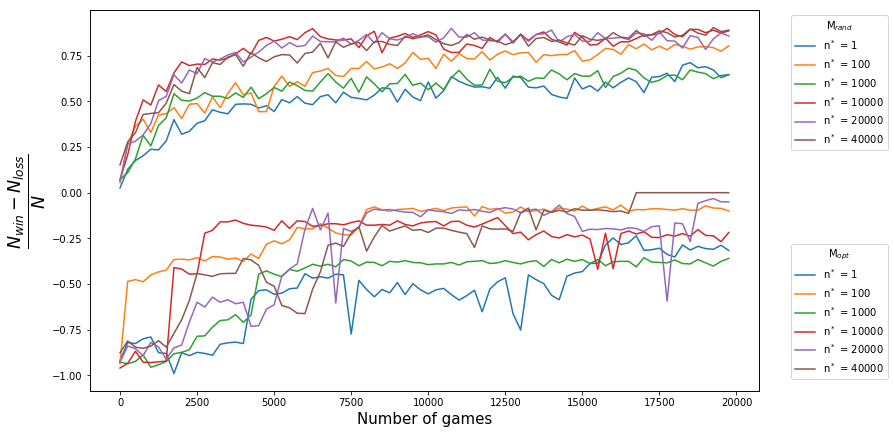

In [26]:
env = TictactoeEnv()
playersQ8 = [QLearningPlayer(decreasing_exploration=True, n_star=1), 
           QLearningPlayer(decreasing_exploration=True, n_star=100), 
           QLearningPlayer(decreasing_exploration=True, n_star=1000), 
           QLearningPlayer(decreasing_exploration=True, n_star=10000), 
           QLearningPlayer(decreasing_exploration=True, n_star=20000), 
           QLearningPlayer(decreasing_exploration=True, n_star=40000)]

M_opts = []
M_rands = []
for player in playersQ8:
    M_opt, M_rand = run_against_itself(player, n_games=20000, return_M_opt=True, return_M_rand=True)
    M_opts.append(M_opt)
    M_rands.append(M_rand)
    
ns = [1, 100, 1000, 10000, 20000, 40000]
x = np.arange(0,20000,250)
fig, ax = plt.subplots(figsize= (12,7))

for i, n in enumerate(ns):
    ax.plot(x, M_opts[i], label = r'n$^*$ = {:.0f}'.format(n))

ax.legend( loc = 'upper left', title = r'M$_{{opt}}$', bbox_to_anchor = (1.04, 0.4), prop={'size': 10}) 


ax2 = ax.twiny()
for i, n in enumerate(ns):
    ax2.plot(x, M_rands[i], label = r'n$^*$ = {:.0f}'.format(n))
ax2.get_xaxis().set_visible(False) 
ax2.legend(loc = 'upper left', title = r'M$_{{rand}}$', bbox_to_anchor = (1.04, 1), prop={'size': 10}) 

ax.yaxis.label.set_size(25)
ax.xaxis.label.set_size(15)
ax.set_ylabel(r"$\frac{N_{win} - N_{loss}}{N}$")
ax.set_xlabel("Number of games")

### Question 9. <a class="anchor" id="Q9"></a>
What are the highest values of $M_{opt}$ and $M_{rand}$ that you could achieve after playing 20’000 games?

#### Answer:

In [27]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [28]:
print("Best M_opt after 20000 games: {:.3f}".format(np.max(M_opts)))
print('Best M_rand after 20000 games: {:.3f}'.format(np.max(M_rands)))
M_opts_self = M_opts
M_rands_self = M_rands

Best M_opt after 20000 games: 0.000
Best M_rand after 20000 games: 0.904


### Question 10. <a class="anchor" id="Q10"></a>
For three board arrangements (i.e. states s), visualize *Q*-values of available actions (e.g. using heat maps). Does the result make sense? Did the agent learn the game well? <br>
*Expected answer:* A figure with 3 subplots of 3 different states with Q-values shown at available actions (caption length < 200 words).

#### Answer:

In [29]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

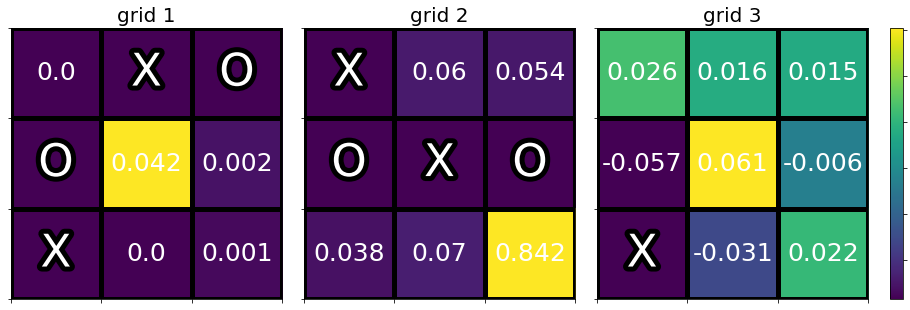

In [30]:
best_player = playersQ8[-1]

grid_1 = np.array([[0,1,-1],
                  [-1,0,0],
                  [1,0,0]])

grid_2 = np.array([[1,0,0],
                  [-1,1,-1],
                  [0,0,0]])

grid_3 = np.array([[0,0,0],
                  [0,0,0],
                  [1,0,0]])

grids = [grid_1, grid_2, grid_3]
str_grids = [grid_to_string(grid_1), grid_to_string(grid_2), grid_to_string(grid_3)]
Q_values = []
for grid in grids:
    grid = grid_to_string(grid)
    Qs = best_player.Q[grid].copy()
    ids = [i[0] for i in list(Qs.items())]
    new_grid = [0] * 9
    for a in range(9):
        if a not in ids:
            Qs[a] = 0.0
        new_grid[a] = Qs[a]
    
    Q_values.append(np.array(new_grid).reshape((3,3)))
    
fig = plt.figure(figsize=(16,16))
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 3),
                axes_pad=0.3,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single")

for idx, (val, ax) in enumerate(zip(Q_values, grid)):
    val = np.round_(val,3)
    temp_val = val.copy()
    str_grid = list(str_grids[idx])
    it = 0
    for i in range(3):
        for j in range(3):
            if str_grid[it] in ["X","O"]:
                val[i,j] = -1
                text = ax.text(j, i, str_grid[it], ha="center", va="center", color="w", size=45)
                text.set_path_effects([PathEffects.withStroke(linewidth=10, foreground='black')])
            else:
                str_grid[it] = val[i,j]
                text = ax.text(j, i, str_grid[it], ha="center", va="center", color="w", size=25)
            it+=1
    im = ax.imshow(val, vmin=np.amin(temp_val), vmax=np.amax(temp_val))
    ax.set_xticks([-0.5, 0.5, 1.5, 2.5])
    ax.set_yticks([-0.5, 0.5, 1.5, 2.5])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(True, linestyle="-", color = "black", linewidth=5)
    ax.set_title("grid {}".format(idx+1), size=20)
    
grid.cbar_axes[0].colorbar(im)

for cax in grid.cbar_axes:
    cax.toggle_label(False)

plt.show()

## 3 Deep Q-Learning <a class="anchor" id="section3"></a>
As our 2nd algorithm, we use Deep Q-Learning (DQN) combined with $\epsilon$-greedy policy. You can watch
again Part 1 of Deep Reinforcement Learning Lecture 1 for an introduction to DQN and Part 1 of
Deep Reinforcement Learning Lecture 2 (in particular slide 8) for more details. The idea in DQN is
to approximate Q-values by a neural network instead of a look-up table as in Tabular Q-learning. For
implementation, you can use ideas from the DQN tutorials of Keras and PyTorch.

## 3.1 Implementation details <a class="anchor" id="section3.1"></a>
**State representation:** We represent state st by a 3 × 3 × 2 tensor x t. Each element of x t takes a value of 0 or 1. The 3 × 3 matrix x t[:, :, 0] shows positions taken by you, and x t[:, :, 1] shows positions taken by your opponent. If x t[i,j,0] = x t[i,j,1] = 0, then position (i, j) is available. <br>
**Neural network architecture:** We use a fully connected network. State x t is fed to the network at the input layer. We consider 2 hidden layers each with 128 neurons – with ReLu activation functions. The output layer has 9 neurons (for 9 different actions) with linear activation functions. Each neuron at the output layer shows the Q-value of the corresponding action at state x t. <br>
**Unavailable actions:** For DQN, we do not constraint actions to only available actions. However, whenever the agent takes an unavailable action, we end the game and give the agent a negative reward of value runav = −1. <br>
**Free parameters:** DQN has many hyper parameters. For convenience, we fix the discount factor at γ = 0.99. We assume a buffer size of 10’000 and a batch size of 64. We update the target network every 500 games. Instead of squared loss, we use the Huber loss (with δ = 1) with Adam optimizer (c.f. the DQN tutorials of Keras and PyTorch). You can fine tune the learning rate if needed, but we suggest 5 × 10−4 as a starting point. <br>
**Other options?** There are tens of different ways to make training of deep networks more efficient. Do you feel like trying some and learning more? You are welcome to do so; you just need to explain the main features of your implementation and a brief summary of your reasoning in less than 300 words – under the title ‘Implementation details’ in your report.

## 3.2 Learning from experts <a class="anchor" id="section3.2"></a>
Implement the DQN algorithm. To check the algorithm, run a DQN agent with a fixed and arbitrary $\epsilon$ ∈ [0, 1] against Opt(0.5) for 20’000 games – switch the 1st player after every game.

### Question 11. <a class="anchor" id="Q11"></a>
Plot average reward and average training loss for every 250 games during training. Does the loss decrease? Does the agent learn to play Tic Tac Toe? <br>
*Expected answer:* A figure with two subplots (caption length < 50 words). Specify your choice of $\epsilon$.

#### Answer:

In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [03:53<00:00, 85.66it/s]


Text(0.5, 0, 'Number of games')

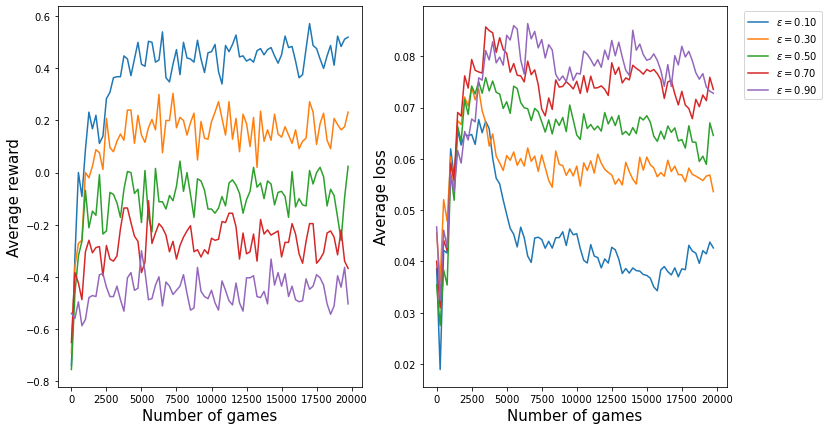

In [3]:
players = [DeepQLearningPlayer(eps=0.1), DeepQLearningPlayer(eps=0.3), DeepQLearningPlayer(eps=0.5), DeepQLearningPlayer(eps=0.7), DeepQLearningPlayer(eps=0.9)]
env = TictactoeEnv()
rewards = []
avg_losses = []
for player in players:
    reward, _, _, avg_loss = run_DQN_against_Opt(player, n_games=20000, opt_eps=0.5, return_average_loss=True)
    avg_losses.append(avg_loss)
    rewards.append(reward)
    
epsilons = [0.1, 0.3, 0.5, 0.7, 0.9]
x = np.arange(0,20000,250)
fig, axs = plt.subplots(1, 2, figsize= (12,7))

for i, epsilon in enumerate(epsilons):
    axs[0].plot(x, rewards[i], label = r'$\epsilon = {:.2f}$'.format(epsilon))


for i, epsilon in enumerate(epsilons):
    axs[1].plot(x, avg_losses[i], label = r'$\epsilon = {:.2f}$'.format(epsilon))
axs[1].legend(loc = 'upper left', bbox_to_anchor = (1.04, 1), prop={'size': 10})

axs[0].yaxis.label.set_size(15)
axs[0].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[0].set_ylabel("Average reward")
axs[1].set_ylabel("Average loss")
axs[0].set_xlabel("Number of games")
axs[1].set_xlabel("Number of games")

### Question 12. <a class="anchor" id="Q12"></a>
Repeat the training but without the replay buffer and with a batch size of 1: At every step, update the network by using only the latest transition. What do you observe? <br>
*Expected answer:* A figure with two subplots showing average reward and average training loss during training (caption length < 50 words).

#### Answer:

In [4]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [02:23<00:00, 139.33it/s]


Text(0.5, 0, 'Number of games')

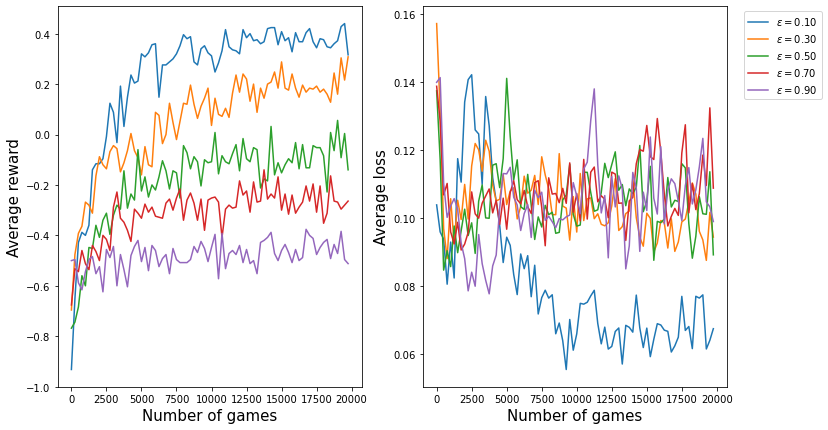

In [5]:
env = TictactoeEnv()
players = [DeepQLearningPlayer(eps=0.1, buffer_size=1, batch_size=1), 
           DeepQLearningPlayer(eps=0.3, buffer_size=1, batch_size=1), 
           DeepQLearningPlayer(eps=0.5, buffer_size=1, batch_size=1), 
           DeepQLearningPlayer(eps=0.7, buffer_size=1, batch_size=1), 
           DeepQLearningPlayer(eps=0.9, buffer_size=1, batch_size=1)]

rewards = []
avg_losses = []
for player in players:
    reward, _, _, avg_loss = run_DQN_against_Opt(player, n_games=20000, opt_eps=0.5, return_average_loss=True)
    rewards.append(reward)
    avg_losses.append(avg_loss)
    
epsilons = [0.1, 0.3, 0.5, 0.7, 0.9]
x = np.arange(0,20000,250)
fig, axs = plt.subplots(1, 2, figsize= (12,7))

for i, epsilon in enumerate(epsilons):
    axs[0].plot(x, rewards[i], label = r'$\epsilon = {:.2f}$'.format(epsilon))

for i, epsilon in enumerate(epsilons):
    axs[1].plot(x, avg_losses[i], label = r'$\epsilon = {:.2f}$'.format(epsilon))
axs[1].legend(loc = 'upper left', bbox_to_anchor = (1.04, 1), prop={'size': 10}) 

axs[0].yaxis.label.set_size(15)
axs[0].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[0].set_ylabel("Average reward")
axs[1].set_ylabel("Average loss")
axs[0].set_xlabel("Number of games")
axs[1].set_xlabel("Number of games")

Instead of fixing $\epsilon$, use $\epsilon$(n) in Equation 1. For different values of n$^*$, run your DQN against Opt(0.5) for 20’000 games – switch the 1st player after every game. Choose several values of n∗ from a reasonably wide interval between 1 to 40’000 – particularly, include n$^*$ = 1.

### Question 13. <a class="anchor" id="Q13"></a>
After every 250 games during training, compute the ‘test’ $M_{opt}$ and $M_{rand}$ for your agents. Plot $M_{opt}$ and $M_{rand}$ over time. Does decreasing $\epsilon$ help training compared to having a fixed $\epsilon$ ? What is the effect of n$^*$ ? <br>
*Expected answer:* A figure showing $M_{opt}$ and $M_{rand}$ over time for different values of speeds of n$^*$ (caption length < 250 words).

#### Answer:

In [6]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [08:20<00:00, 39.97it/s]


Text(0.5, 0, 'Number of games')

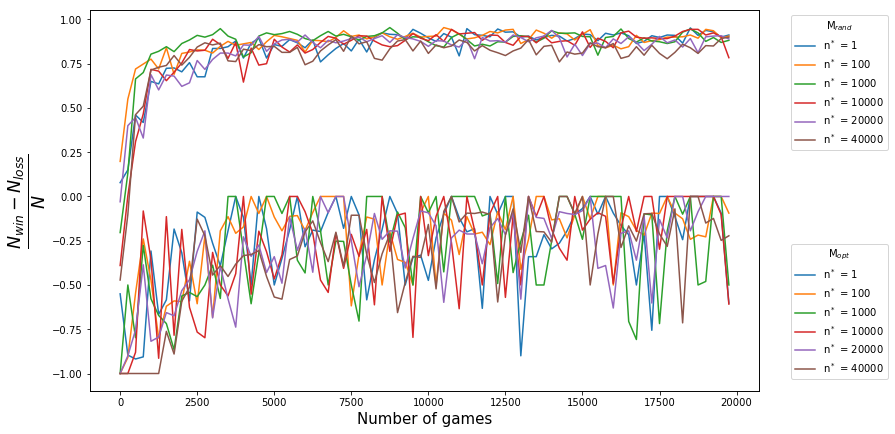

In [7]:
env = TictactoeEnv()
players = [DeepQLearningPlayer(decreasing_exploration=True, n_star=1), 
           DeepQLearningPlayer(decreasing_exploration=True, n_star=100), 
           DeepQLearningPlayer(decreasing_exploration=True, n_star=1000), 
           DeepQLearningPlayer(decreasing_exploration=True, n_star=10000), 
           DeepQLearningPlayer(decreasing_exploration=True, n_star=20000), 
           DeepQLearningPlayer(decreasing_exploration=True, n_star=40000)]

M_opts = []
M_rands = []
for player in players:
    _, M_opt, M_rand, _ = run_DQN_against_Opt(player, n_games=20000, opt_eps=0.5, return_M_opt=True, return_M_rand=True)
    M_opts.append(M_opt)
    M_rands.append(M_rand)
    
ns = [1, 100, 1000, 10000, 20000, 40000]
x = np.arange(0,20000,250)
fig, ax = plt.subplots(figsize= (12,7))

for i, n in enumerate(ns):
    ax.plot(x, M_opts[i], label = r'n$^*$ = {:.0f}'.format(n))

ax.legend( loc = 'upper left', title = r'M$_{{opt}}$', bbox_to_anchor = (1.04, 0.4), prop={'size': 10}) 

ax2 = ax.twiny()
for i, n in enumerate(ns):
    ax2.plot(x, M_rands[i], label = r'n$^*$ = {:.0f}'.format(n))
ax2.get_xaxis().set_visible(False) 
ax2.legend(loc = 'upper left', title = r'M$_{{rand}}$', bbox_to_anchor = (1.04, 1), prop={'size': 10}) 

ax.yaxis.label.set_size(25)
ax.xaxis.label.set_size(15)
ax.set_ylabel(r"$\frac{N_{win} - N_{loss}}{N}$")
ax.set_xlabel("Number of games")

 Choose the best value of n$^*$ that you found. Run DQN against Opt($\epsilon_{opt}$) for different values of $\epsilon_{opt}$ for 20’000 games – switch the 1st player after every game. Choose several values of $\epsilon_{opt}$ from a reasonably wide interval between 0 to 1 – particularly, include $\epsilon_{opt}$ = 0.

### Question 14. <a class="anchor" id="Q14"></a>
After every 250 games during training, compute the ‘test’ $M_{opt}$ and $M_{rand}$ for your agents for each value of $\epsilon_{opt}$. Plot $M_{opt}$ and $M_{rand}$ over time. What do you observe? How can you explain it? <br>
*Expected answer:* A figure showing $M_{opt}$ and $M_{rand}$ over time for different values of $\epsilon_{opt}$ (caption length < 250 words).

#### Answer:

In [8]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [ ]:
env = TictactoeEnv()
players = [DeepQLearningPlayer(decreasing_exploration=True, n_star=1000),
           DeepQLearningPlayer(decreasing_exploration=True, n_star=1000),
           DeepQLearningPlayer(decreasing_exploration=True, n_star=1000),
           DeepQLearningPlayer(decreasing_exploration=True, n_star=1000),
           DeepQLearningPlayer(decreasing_exploration=True, n_star=1000)]

M_opts = []
M_rands = []
opts_eps = [0, 0.2, 0.5, 0.8, 1]
for i, opt_eps in enumerate(opts_eps):
    _, M_opt, M_rand, _ = run_DQN_against_Opt(players[i], n_games=20000, opt_eps=opt_eps, return_M_opt=True, return_M_rand=True)
    rewards.append(reward)
    M_opts.append(M_opt)
    M_rands.append(M_rand)
    
x = np.arange(0,20000,250)
fig, ax = plt.subplots(figsize= (12,7))

for i, opt_eps in enumerate(opts_eps):
    ax.plot(x, M_opts[i], label = r"$\epsilon_{{opt}}$ = {}".format(opt_eps))

ax.legend( loc = 'upper left', title = r'M$_{{opt}}$', bbox_to_anchor = (1.04, 0.4), prop={'size': 10}) 


ax2 = ax.twiny()
for i, opt_eps in enumerate(opts_eps):
    ax2.plot(x, M_rands[i], label = r"$\epsilon_{{opt}}$ = {}".format(opt_eps))
ax2.get_xaxis().set_visible(False) 
ax2.legend(loc = 'upper left', title = r'M$_{{rand}}$', bbox_to_anchor = (1.04, 1), prop={'size': 10}) 

ax.yaxis.label.set_size(25)
ax.xaxis.label.set_size(15)
ax.set_ylabel(r"$\frac{N_{win} - N_{loss}}{N}$")
ax.set_xlabel("Number of games")

 29%|██████████████████████▏                                                      | 5749/20000 [02:39<04:02, 58.69it/s]

### Question 15. <a class="anchor" id="Q15"></a>
What are the highest values of $M_{opt}$ and $M_{rand}$ that you could achieve after playing 20’000 games?

#### Answer:

In [ ]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [ ]:
print("Best M_opt after 20000 games: {:.3f}".format(np.max(M_opts)))
print('Best M_rand after 20000 games: {:.3f}'.format(np.max(M_rands)))
M_opts_expert_DQ = M_opts
M_rands_expert_DQ = M_rands

## 3.3 Learning by self-practice <a class="anchor" id="section3.3"></a>
For different values of $\epsilon$ ∈ [0, 1], run a DQN agent against itself for 20’000 games – i.e. both players use
the same neural network and share the same replay buffer. Important note: For one player, you should add states $s_t$ and $s_{t'}$ as x_t and x_tp to the replay buffer, but for the other player, you should first swap the opponent positions (x_t[:, :, 1] and x_tp[:, :, 1]) with the agent’s own positions (x_t[:, :, 0] and x_tp[:, :, 0]) and then add them to the replay buffer. 

### Question 16. <a class="anchor" id="Q16"></a>
After every 250 games during training, compute the ‘test’ $M_{opt}$ and $M_{rand}$ for different
values of $\epsilon$ ∈ [0, 1]. Plot $M_{opt}$ and $M_{rand}$ over time. Does the agent learn to play Tic Tac Toe ? What is the effect of $\epsilon$ ? <br>
*Expected answer:* A figure showing $M_{opt}$ and $M_{rand}$ over time for different values of $\epsilon$ ∈ [0, 1] (caption length < 100 words). Instead of fixing $\epsilon$, use $\epsilon$(n) in Equation 1 with different values of n$^*$.

#### Answer:

In [ ]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [ ]:
env = TictactoeEnv()
players = [DeepQLearningPlayer(eps=0.1), 
           DeepQLearningPlayer(eps=0.3), 
           DeepQLearningPlayer(eps=0.5), 
           DeepQLearningPlayer(eps=0.7), 
           DeepQLearningPlayer(eps=0.9)]

M_opts = []
M_rands = []
for player in players:
    M_opt, M_rand, _ = run_DQN_against_itself(player, n_games=20000, return_M_opt=True, return_M_rand=True)
    M_opts.append(M_opt)
    M_rands.append(M_rand)
    
epsilons = [0.1, 0.3, 0.5, 0.7, 0.9]
x = np.arange(0,20000,250)
fig, ax = plt.subplots(figsize= (12,7))

for i, epsilon in enumerate(epsilons):
    ax.plot(x, M_opts[i], label = r"$\epsilon = {:.2f}$".format(epsilon))

ax.legend( loc = 'upper left', title = r'M$_{{opt}}$', bbox_to_anchor = (1.04, 0.4), prop={'size': 10}) 


ax2 = ax.twiny()
for i, epsilon in enumerate(epsilons):
    ax2.plot(x, M_rands[i], label = r"$\epsilon = {:.2f}$".format(epsilon))
ax2.get_xaxis().set_visible(False) 
ax2.legend(loc = 'upper left', title = r'M$_{{rand}}$', bbox_to_anchor = (1.04, 1), prop={'size': 10}) 

ax.yaxis.label.set_size(25)
ax.xaxis.label.set_size(15)
ax.set_ylabel(r"$\frac{N_{win} - N_{loss}}{N}$")
ax.set_xlabel("Number of games")

### Question 17. <a class="anchor" id="Q17"></a>
After every 250 games during training, compute the ‘test’ $M_{opt}$ and $M_{rand}$ for your agents.
Plot $M_{opt}$ and $M_{rand}$ over time. Does decreasing $\epsilon$ help training compared to having a fixed $\epsilon$ ? What is the effect of n$^*$ ? <br>
*Expected answer:* A figure showing $M_{opt}$ and $M_{rand}$ over time for different values of speeds of n$^*$ (caption length < 100 words).

#### Answer:

In [ ]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [ ]:
env = TictactoeEnv()
playersQ17 = [DeepQLearningPlayer(decreasing_exploration=True, n_star=1), 
           DeepQLearningPlayer(decreasing_exploration=True, n_star=100), 
           DeepQLearningPlayer(decreasing_exploration=True, n_star=1000), 
           DeepQLearningPlayer(decreasing_exploration=True, n_star=10000), 
           DeepQLearningPlayer(decreasing_exploration=True, n_star=20000), 
           DeepQLearningPlayer(decreasing_exploration=True, n_star=40000)]

M_opts = []
M_rands = []
for player in playersQ17:
    M_opt, M_rand, _ = run_DQN_against_itself(player, n_games=20000, return_M_opt=True, return_M_rand=True)
    M_opts.append(M_opt)
    M_rands.append(M_rand)
    
ns = [1, 100, 1000, 10000, 20000, 40000]
x = np.arange(0,20000,250)
fig, ax = plt.subplots(figsize= (12,7))

for i, n in enumerate(ns):
    ax.plot(x, M_opts[i], label = r'n$^*$ = {:.0f}'.format(n))

ax.legend( loc = 'upper left', title = r'M$_{{opt}}$', bbox_to_anchor = (1.04, 0.4), prop={'size': 10}) 


ax2 = ax.twiny()
for i, n in enumerate(ns):
    ax2.plot(x, M_rands[i], label = r'n$^*$ = {:.0f}'.format(n))
ax2.get_xaxis().set_visible(False) 
ax2.legend(loc = 'upper left', title = r'M$_{{rand}}$', bbox_to_anchor = (1.04, 1), prop={'size': 10}) 

ax.yaxis.label.set_size(25)
ax.xaxis.label.set_size(15)
ax.set_ylabel(r"$\frac{N_{win} - N_{los}}{N}$")
ax.set_xlabel("Number of games")

### Question 18. <a class="anchor" id="Q18"></a>
What are the highest values of $M_{opt}$ and $M_{rand}$ that you could achieve after playing 20’000 games?

#### Answer:

In [ ]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [ ]:
print("Best M_opt after 20000 games: {:.3f}".format(np.max(M_opts)))
print('Best M_rand after 20000 games: {:.3f}'.format(np.max(M_rands)))
M_opts_self_DQ = M_opts
M_rands_self_DQ = M_rands

### Question 19. <a class="anchor" id="Q19"></a>
For three board arrangements (i.e. states s), visualize *Q*-values of available actions (e.g. using heat maps). Does the result make sense? Did the agent learn the game well? <br>
*Expected answer:* A figure with 3 subplots of 3 different states with *Q*-values shown at available actions (caption length < 200 words).

#### Answer:

In [ ]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [ ]:
best_player = playersQ17[-2]

grid_1 = np.array([[0,1,-1],
                  [-1,0,0],
                  [1,0,0]])

grid_2 = np.array([[1,0,0],
                  [-1,1,-1],
                  [0,0,0]])

grid_3 = np.array([[0,0,0],
                  [0,0,0],
                  [1,0,0]])

grids = [grid_1, grid_2, grid_3]
str_grids = [grid_to_string(grid_1), grid_to_string(grid_2), grid_to_string(grid_3)]
Q_values = []
for grid in grids:
    grid = grid_to_string(grid)
    Qs = best_player.policy_net(grid_to_tensor(grid)).copy()
    ids = [i[0] for i in list(Qs.items())]
    new_grid = [0] * 9
    for a in range(9):
        if a not in ids:
            Qs[a] = 0.0
        new_grid[a] = Qs[a]
    
    Q_values.append(np.array(new_grid).reshape((3,3)))
    
fig = plt.figure(figsize=(16,16))
grid = AxesGrid(fig, 111,
                nrows_ncols=(1, 3),
                axes_pad=0.3,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single")

for idx, (val, ax) in enumerate(zip(Q_values, grid)):
    val = np.round_(val,3)
    temp_val = val.copy()
    str_grid = list(str_grids[idx])
    it = 0
    for i in range(3):
        for j in range(3):
            if str_grid[it] in ["X","O"]:
                val[i,j] = -1
                text = ax.text(j, i, str_grid[it], ha="center", va="center", color="w", size=45)
                text.set_path_effects([PathEffects.withStroke(linewidth=10, foreground='black')])
            else:
                str_grid[it] = val[i,j]
                text = ax.text(j, i, str_grid[it], ha="center", va="center", color="w", size=25)
            it+=1
    im = ax.imshow(val, vmin=np.amin(temp_val), vmax=np.amax(temp_val))
    ax.set_xticks([-0.5, 0.5, 1.5, 2.5])
    ax.set_yticks([-0.5, 0.5, 1.5, 2.5])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(True, linestyle="-", color = "black", linewidth=5)
    ax.set_title("grid {}".format(idx+1), size=20)
    
grid.cbar_axes[0].colorbar(im)

for cax in grid.cbar_axes:
    cax.toggle_label(False)

plt.show()

## 4 Comparing Q-Learning with Deep Q-Learning <a class="anchor" id="section4"></a>
We define the training time Ttrain as the number of games an algorithm needs to play in order to reach 80% of its final performance according to both $M_{opt}$ and $M_{rand}$.

### Question 20. <a class="anchor" id="Q20"></a>
Include a table showing the best performance (the highest $M_{opt}$ and $M_{rand}$) of Q-Learning and DQN (both for learning from experts and for learning by self-practice) and their corresponding training time. <br>
*Expected answer:* A table showing 12 values.

#### Answer:

In [ ]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

### Question 21. <a class="anchor" id="Q21"></a>
Compare your results for DQN and Q-Learning (answer length < 300 words).

#### Answer:

In [ ]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [ ]:
pass